In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
import tensorflow.keras.optimizers as optimizers
from tensorflow.keras.utils import *

keras.__version__

'2.4.0'

In [2]:
import tensorflow.keras.datasets.reuters as reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2113536/2110848 [==============================] - 20s 10us/step


In [12]:
train_data.shape
max(train_labels)
#rain_data[0]

45

In [6]:
w_to_i = reuters.get_word_index()
i_to_w = dict(
    [(value,key) for (key,value) in w_to_i.items()]
)

557056/550378 [==============================] - 6s 10us/step


In [7]:
i_to_w[1]
decode_review = ''.join([i_to_w.get(i-3, '?')+' ' for i in train_data[0]])
decode_review

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3 '

In [17]:
def transform_data(data, dimension = 10000):
    embeding = np.zeros((len(data), dimension))
    for (i,sentence_i_list) in enumerate(data):
        embeding[i, sentence_i_list] = 1
    return embeding
x_train = transform_data(train_data)
x_test  = transform_data(test_data)
#y_train = np.array(train_labels).astype('float32')
#y_test = np.array(test_labels).astype('float32')
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
len(y_test[0])

46

In [26]:
network = models.Sequential()
network.add(layers.Dense(1000,activation='relu',input_shape=(10000,)))
network.add(layers.Dense(500, activation='relu'))
network.add(layers.Dense(100, activation='relu'))
network.add(layers.Dense(46, activation='softmax'))
network.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
fit_result = network.fit(transform_data(train_data),
                         y_train, 
                         epochs=5, 
                         batch_size=512,
                         validation_data=(x_test, y_test)
                        )
train_history = fit_result.history

Epoch 1/5
18/18 [==============================] - 4s 220ms/step - loss: 1.8835 - accuracy: 0.5556 - val_loss: 1.3793 - val_accuracy: 0.6674
Epoch 2/5
18/18 [==============================] - 4s 209ms/step - loss: 0.9136 - accuracy: 0.7845 - val_loss: 1.0009 - val_accuracy: 0.7694
Epoch 3/5
18/18 [==============================] - 4s 210ms/step - loss: 0.5423 - accuracy: 0.8668 - val_loss: 1.0082 - val_accuracy: 0.7747
Epoch 4/5
18/18 [==============================] - 4s 226ms/step - loss: 0.2981 - accuracy: 0.9314 - val_loss: 1.1463 - val_accuracy: 0.7524
Epoch 5/5
18/18 [==============================] - 4s 221ms/step - loss: 0.2375 - accuracy: 0.9377 - val_loss: 1.0869 - val_accuracy: 0.7836


In [19]:
#tf.keras.losses.categorical_crossentropy
#categorical_crossentropy
#optimizers.RMSprop(lr=0.001)

In [22]:
train_history

{'loss': [1.9553567171096802,
  0.955845296382904,
  0.6405573487281799,
  0.4293549358844757,
  0.32606980204582214],
 'accuracy': [0.599755048751831,
  0.7967045307159424,
  0.8639501333236694,
  0.9100422859191895,
  0.9305277466773987],
 'val_loss': [1.3537386655807495,
  1.0807921886444092,
  0.9373294711112976,
  0.931855320930481,
  0.9155270457267761],
 'val_accuracy': [0.6963490843772888,
  0.7613534927368164,
  0.7894033789634705,
  0.7898486256599426,
  0.8018699884414673]}

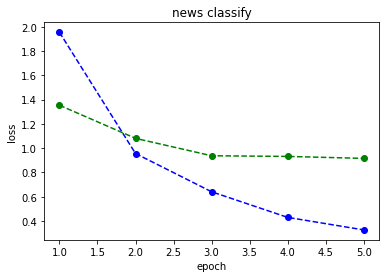

In [25]:
loss_values = train_history['loss']
val_loss = train_history['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo--', label='train loss')
plt.plot(epochs, val_loss, 'bo--', color='green', label='test loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('news classify')
plt.show()